In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings (if necessary)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset
data = pd.read_csv('Financial Analytics data.csv')

# Identify missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Move data from "Unnamed: 4" to "Sales Qtr - Crore" where "Sales Qtr - Crore" is NaN
mask = data['Unnamed: 4'].notna() & data['Sales Qtr - Crore'].isna()
data.loc[mask, 'Sales Qtr - Crore'] = data.loc[mask, 'Unnamed: 4']

# Drop the "Unnamed: 4" column as it's no longer needed
data = data.drop(columns=['Unnamed: 4'])

# Convert infinite values to NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle remaining missing values
data['Mar Cap - Crore'].fillna(data['Mar Cap - Crore'].median(), inplace=True)
data['Sales Qtr - Crore'].fillna(data['Sales Qtr - Crore'].median(), inplace=True)

# Verify the changes
print("Missing values after cleaning:")
print(data.isnull().sum())

# Optionally, save the cleaned dataset
data.to_csv('cleaned_Financial_Analytics_data.csv', index=False)



Missing values before cleaning:
S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64
Missing values after cleaning:
S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


In [2]:
print(data.dtypes)
print(data.describe())

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
dtype: object
            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  488.000000       488.000000         488.000000
mean   251.508197     27708.961086        3649.084570
std    145.884078     58963.329098        9708.054143
min      1.000000      3017.070000           0.000000
25%    122.750000      4879.612500         570.035000
50%    252.500000      9885.050000        1137.170000
75%    378.250000     23400.815000        2580.797500
max    500.000000    583436.720000      110666.930000


In [3]:
correlation = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print(correlation)

# Insights:
# Positive Relationship: The positive correlation suggests that larger market capitalization is associated with higher quarterly sales. 
#  However, this does not imply causation but indicates a tendency that both variables move in the same direction.
# Business Implication: For business analysts, this correlation might suggest that companies with higher market capitalizations generally
#  achieve higher sales, which could be due to factors such as larger market presence, better resources, or more extensive operations.

                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore            1.00000            0.62569
Sales Qtr - Crore          0.62569            1.00000


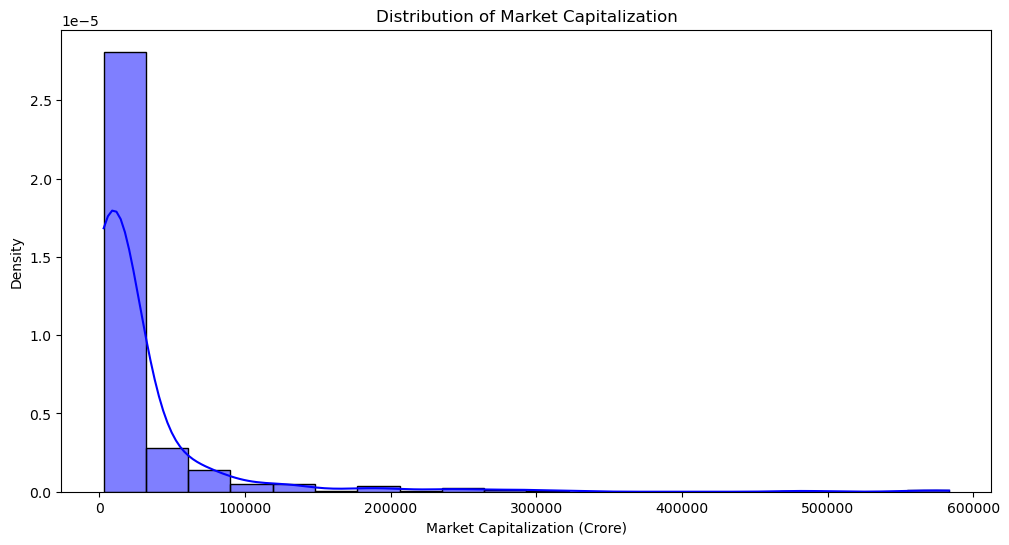

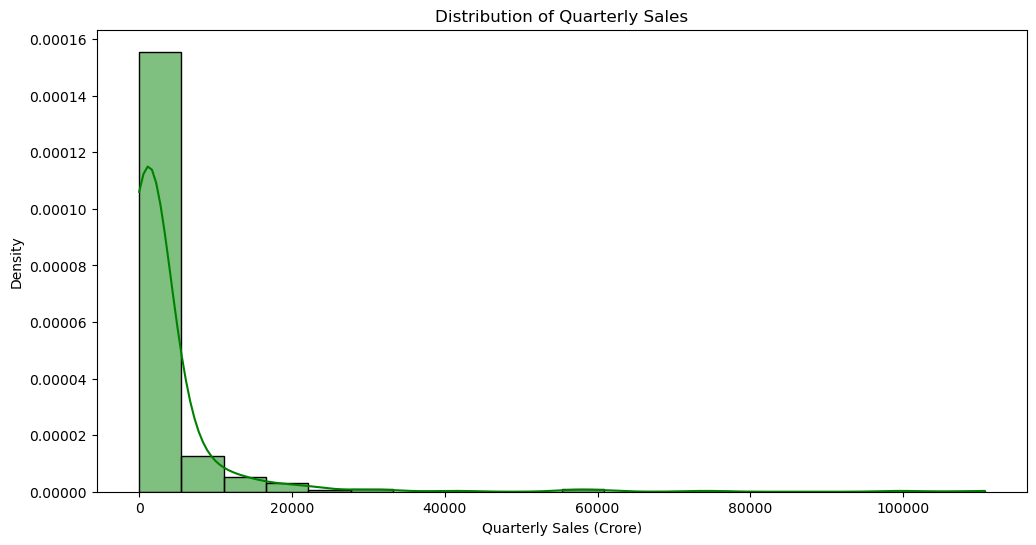

In [4]:
# Distribution of Market Capitalization
plt.figure(figsize=(12, 6))
sns.histplot(data['Mar Cap - Crore'], bins=20, kde=True, color='blue', stat='density')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Density')
plt.show()

# Distribution of Quarterly Sales
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales Qtr - Crore'], bins=20, kde=True, color='green', stat='density')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Density')
plt.show()

# OutCome:
# Both plots help in understanding the distributions of market capitalization and quarterly sales within the dataset:

# Market Capitalization: This histogram reveals how market values are spread among the companies. A common observation might be that the 
#  distribution could be skewed, indicating that a small number of companies have very high market capitalizations compared to others.

# Quarterly Sales: This plot provides insights into the spread and central tendency of quarterly sales. It can reveal whether most companies 
#  have low or high sales or if there's significant variability.

In [5]:
# Calculate Sales-to-Market Cap Ratio
data['Sales_to_MarketCap'] = data['Sales Qtr - Crore'] / data['Mar Cap - Crore']

# Verify the column is created
print(data.head())


   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  \
0      1  Reliance Inds.        583436.72           99810.00   
1      2             TCS        563709.84           30904.00   
2      3       HDFC Bank        482953.59           20581.27   
3      4             ITC        320985.27            9772.02   
4      5         H D F C        289497.37           16840.51   

   Sales_to_MarketCap  
0            0.171073  
1            0.054823  
2            0.042615  
3            0.030444  
4            0.058172  


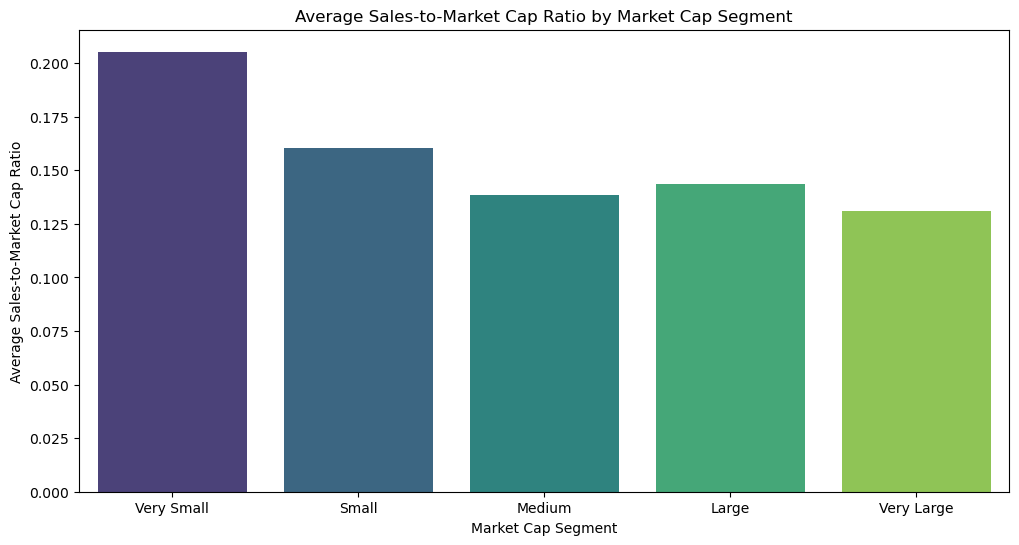

In [6]:
# Create market cap segments
bins = [0, 5000, 20000, 50000, 100000, np.inf]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
data['MarketCap_Segment'] = pd.cut(data['Mar Cap - Crore'], bins=bins, labels=labels)

# Calculate average Sales-to-Market Cap Ratio for each segment
segment_analysis = data.groupby('MarketCap_Segment')['Sales_to_MarketCap'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='MarketCap_Segment', y='Sales_to_MarketCap', data=segment_analysis, palette='viridis')
plt.title('Average Sales-to-Market Cap Ratio by Market Cap Segment')
plt.xlabel('Market Cap Segment')
plt.ylabel('Average Sales-to-Market Cap Ratio')
plt.show()

# Outcome:
# Segments Created: Companies are grouped into segments based on their market capitalization: Very Small, Small, Medium, Large, and Very Large.

# Bar Chart: Displays the average Sales-to-Market Cap Ratio for each segment. This chart helps in understanding how different market cap segments 
#  perform relative to their size. Higher ratios in smaller segments might indicate more efficient companies relative to their size.


Correlation matrix:
                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore            1.00000            0.62569
Sales Qtr - Crore          0.62569            1.00000


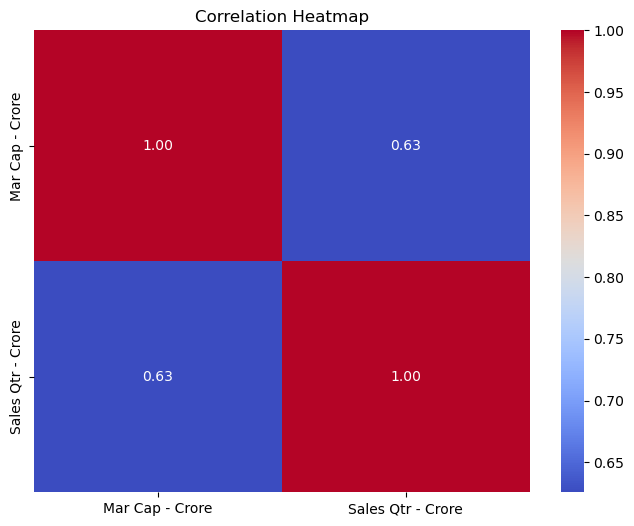

In [7]:
# Correlation matrix
correlation = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print("Correlation matrix:")
print(correlation)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Outcome:
# Correlation Matrix: Shows the correlation coefficients between market capitalization and quarterly sales. The value ranges from -1 to 1,
#  where values close to 1 indicate a strong positive relationship.

# Heatmap: Visualizes the correlation matrix, making it easier to interpret relationships. In this case, a positive correlation suggests 
#  that higher market capitalization is associated with higher quarterly sales.

count    488.000000
mean       0.165978
std        0.214986
min        0.000000
25%        0.058017
50%        0.105237
75%        0.183447
max        1.989031
Name: Sales_to_MarketCap, dtype: float64


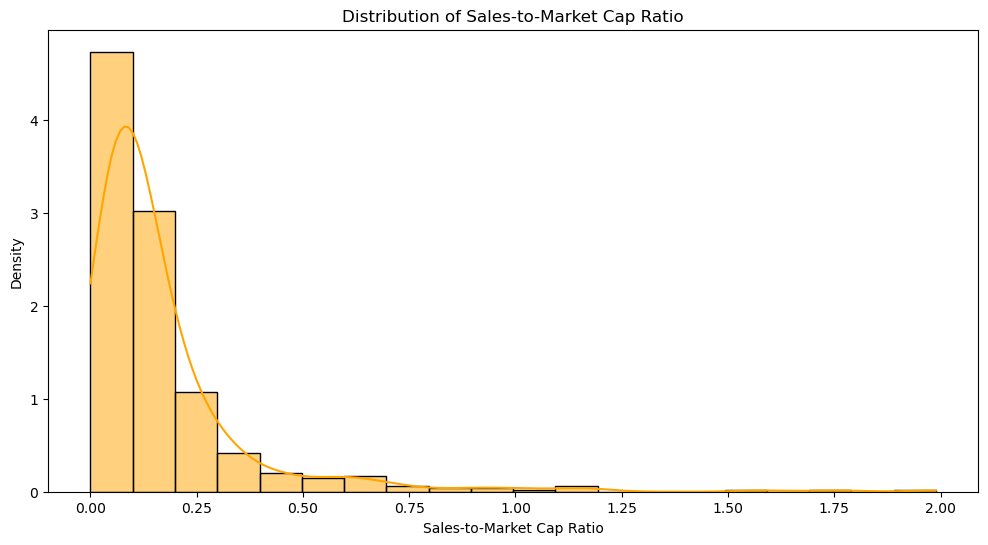

In [8]:
# Calculate Sales-to-Market Cap Ratio
data['Sales_to_MarketCap'] = data['Sales Qtr - Crore'] / data['Mar Cap - Crore']

# Summary statistics for the ratio
print(data['Sales_to_MarketCap'].describe())

# Distribution of Sales-to-Market Cap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales_to_MarketCap'], bins=20, kde=True, color='orange', stat='density')
plt.title('Distribution of Sales-to-Market Cap Ratio')
plt.xlabel('Sales-to-Market Cap Ratio')
plt.ylabel('Density')
plt.show()

# Outcome:
# Sales-to-Market Cap Ratio Calculation: Provides a measure of sales efficiency relative to market capitalization.

# Histogram: Displays the distribution of the Sales-to-Market Cap Ratio. It helps identify how common different efficiency 
#  levels are among the companies. Peaks in the histogram indicate the most common ranges for this ratio.


                 Name  Sales_to_MarketCap  Mar Cap - Crore  Sales Qtr - Crore
320   Redington India            1.989031          5896.54           11728.40
122    Rajesh Exports            1.757986         23495.54           41304.84
334           C P C L            1.582066          5427.82            8587.17
441  Corporation Bank            1.180653          3716.46            4387.85
444     Oriental Bank            1.159876          3674.60            4262.08
410       Andhra Bank            1.118510          4067.25            4549.26
405    Allahabad Bank            1.025796          4137.11            4243.83
54            H P C L            0.990341         58034.78           57474.25
486   Natl.Fertilizer            0.941559          3017.07            2840.75
316    Syndicate Bank            0.883214          6086.37            5375.57
                 Name  Sales_to_MarketCap  Mar Cap - Crore  Sales Qtr - Crore
393  Ujjivan Fin.Ser.            0.000000          4293.42      

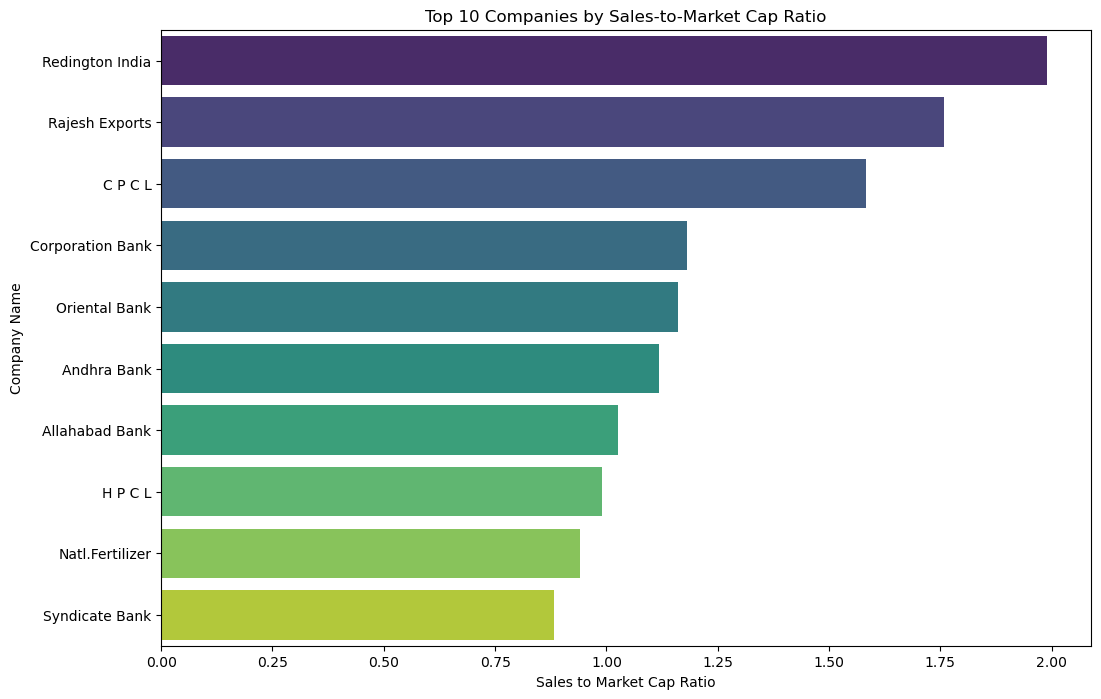

In [9]:
# Top 10 companies by Sales-to-Market Cap Ratio
top_10_sales_to_cap = data.nlargest(10, 'Sales_to_MarketCap')[['Name', 'Sales_to_MarketCap', 'Mar Cap - Crore', 'Sales Qtr - Crore']]
print(top_10_sales_to_cap)

# Bottom 10 companies by Sales-to-Market Cap Ratio
bottom_10_sales_to_cap = data.nsmallest(10, 'Sales_to_MarketCap')[['Name', 'Sales_to_MarketCap', 'Mar Cap - Crore', 'Sales Qtr - Crore']]
print(bottom_10_sales_to_cap)

# Bar chart for Top 10 companies by Sales-to-Market Cap Ratio
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales_to_MarketCap', y='Name', data=top_10_sales_to_cap, palette='viridis')
plt.title('Top 10 Companies by Sales-to-Market Cap Ratio')
plt.xlabel('Sales to Market Cap Ratio')
plt.ylabel('Company Name')
plt.show()

# Outcome:
# Top 10 and Bottom 10 Companies: Lists companies with the highest and lowest Sales-to-Market Cap Ratios. This helps identify which companies 
#  are performing best or worst relative to their market capitalization.

# Bar Chart: Visualizes the top 10 companies by their Sales-to-Market Cap Ratio, providing a clear picture of which companies are the most 
#  efficient at generating sales relative to their size.


             Name  Mar Cap - Crore  Sales Qtr - Crore  Sales_to_MarketCap
0  Reliance Inds.        583436.72           99810.00            0.171073
1             TCS        563709.84           30904.00            0.054823
2       HDFC Bank        482953.59           20581.27            0.042615
3             ITC        320985.27            9772.02            0.030444
4         H D F C        289497.37           16840.51            0.058172
5  Hind. Unilever        288265.26            8590.00            0.029799
6   Maruti Suzuki        263493.81           19283.20            0.073183
7         Infosys        248320.35           17794.00            0.071657
8         O N G C        239981.50           22995.88            0.095824
9  St Bk of India        232763.33           57014.08            0.244944


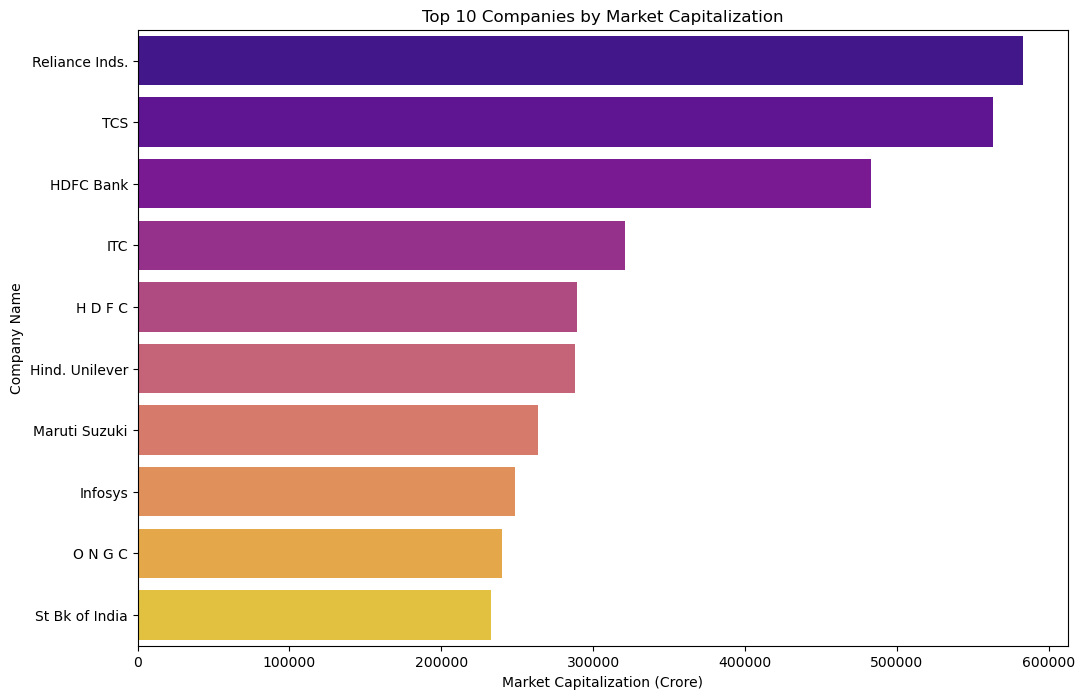

In [10]:
# Top 10 companies by Market Cap
top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Sales_to_MarketCap']]
print(top_10_market_cap)

# Bar chart for Top 10 companies by Market Cap
plt.figure(figsize=(12, 8))
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_10_market_cap, palette='plasma')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Company Name')
plt.show()

# Outcome:
# Top 10 Companies by Market Capitalization: Lists companies with the highest market capitalizations. This can be useful for understanding 
#  the largest players in the market.

# Bar Chart: Displays the top 10 companies by market capitalization, providing a visual comparison of their market size.

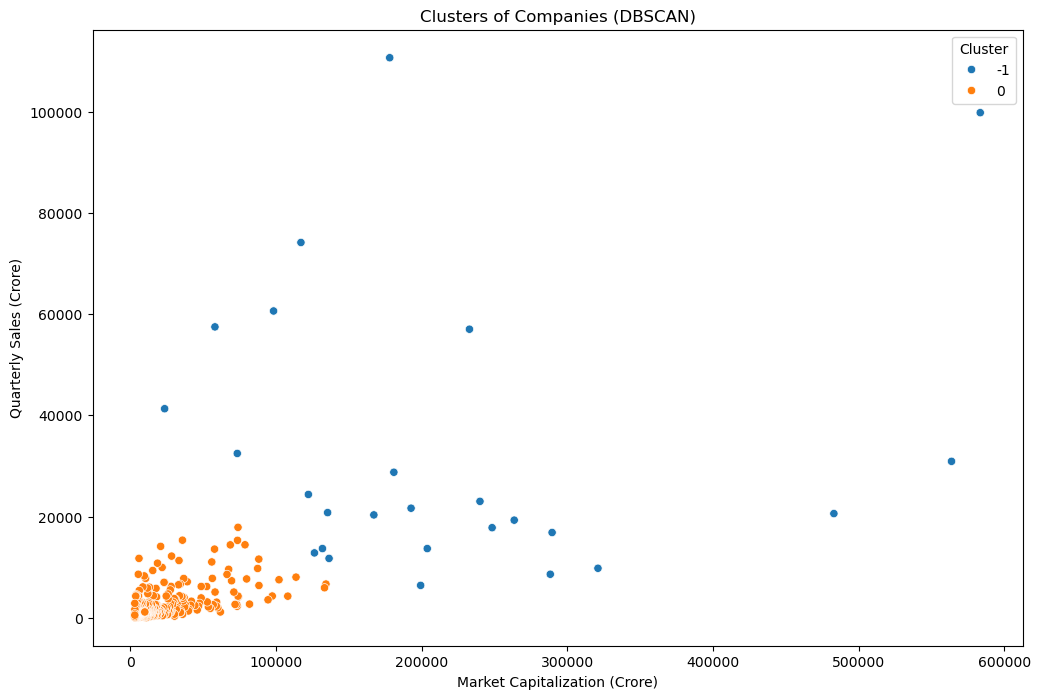

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the relevant features
features_to_scale = ['Mar Cap - Crore', 'Sales Qtr - Crore']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_to_scale])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Mar Cap - Crore'], y=data['Sales Qtr - Crore'], hue=data['Cluster'], palette='tab10')
plt.title('Clusters of Companies (DBSCAN)')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.legend(title='Cluster')
plt.show()


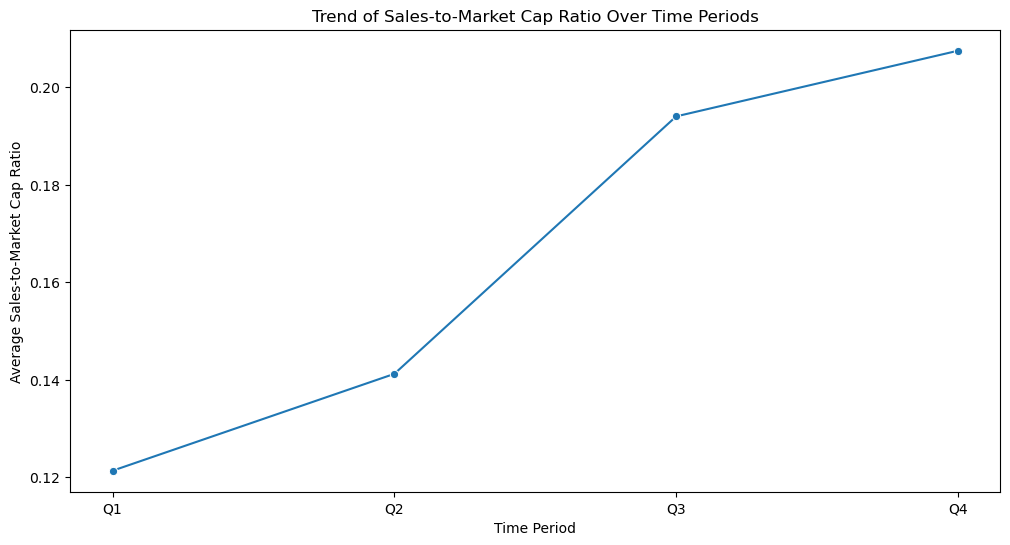

In [13]:
# Create artificial time periods based on quantiles of index
data['Time_Period'] = pd.qcut(data.index, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate average Sales-to-Market Cap Ratio for each time period
trend_analysis = data.groupby('Time_Period')['Sales_to_MarketCap'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time_Period', y='Sales_to_MarketCap', data=trend_analysis, marker='o')
plt.title('Trend of Sales-to-Market Cap Ratio Over Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Average Sales-to-Market Cap Ratio')
plt.show()

# Summary:
# - Created artificial time periods based on quantiles of the dataset index.
# - Analyzed the trend of Sales-to-Market Cap Ratio over these time periods.
# - The line plot shows how this ratio changes across the different periods, indicating potential trends.


<Figure size 1200x1000 with 0 Axes>

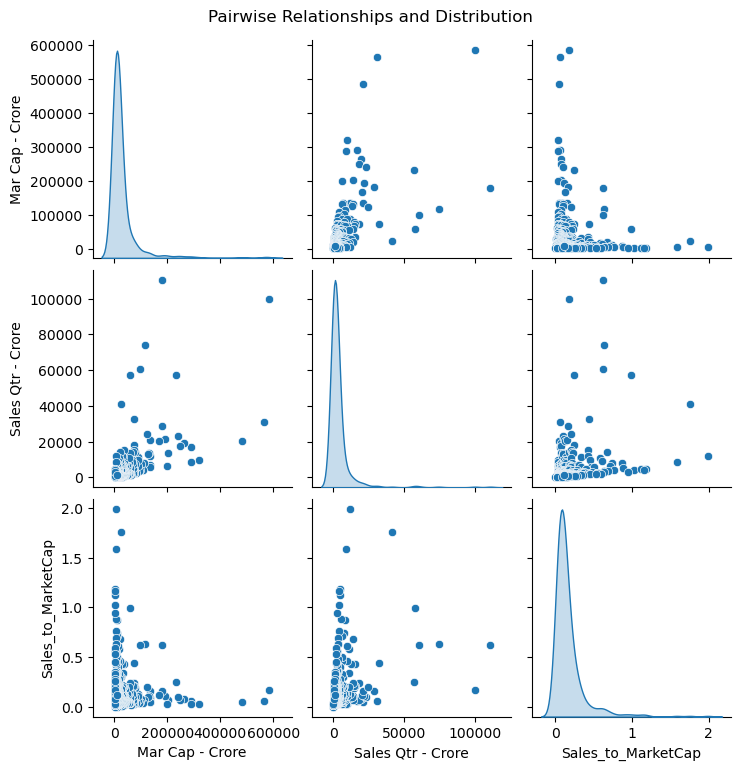

In [14]:
# Pairplot to visualize relationships and detect outliers
plt.figure(figsize=(12, 10))
sns.pairplot(data[['Mar Cap - Crore', 'Sales Qtr - Crore', 'Sales_to_MarketCap']], diag_kind='kde')
plt.suptitle('Pairwise Relationships and Distribution', y=1.02)
plt.show()

# Summary:
# - Pairplot displays relationships between market capitalization, quarterly sales, and the Sales-to-Market Cap Ratio.
# - Helps in identifying correlations, distributions, and outliers.
# - Diagonal KDE plots show the distribution of each variable.


In [15]:
# Define Market Capitalization Segments
bins = [0, 10000, 50000, 100000, np.inf]  # Example bins
labels = ['Small', 'Medium', 'Large', 'Very Large']
data['MarketCap_Segment'] = pd.cut(data['Mar Cap - Crore'], bins=bins, labels=labels)

# Calculate average metrics for each segment
segment_profiles = data.groupby('MarketCap_Segment').agg({
    'Mar Cap - Crore': 'mean',
    'Sales Qtr - Crore': 'mean',
    'Sales_to_MarketCap': 'mean'
}).reset_index()

print(segment_profiles)

# Summary:
# - Segmented companies into categories based on market capitalization.
# - Calculated average market cap, sales, and sales-to-market-cap ratio for each segment.
# - Helps in profiling and understanding the characteristics of different market cap segments.


  MarketCap_Segment  Mar Cap - Crore  Sales Qtr - Crore  Sales_to_MarketCap
0             Small      5478.900241        1045.885663            0.198960
1            Medium     20692.662102        2607.722955            0.129196
2             Large     70005.657222       10180.508056            0.143806
3        Very Large    222059.802222       25735.933704            0.131147


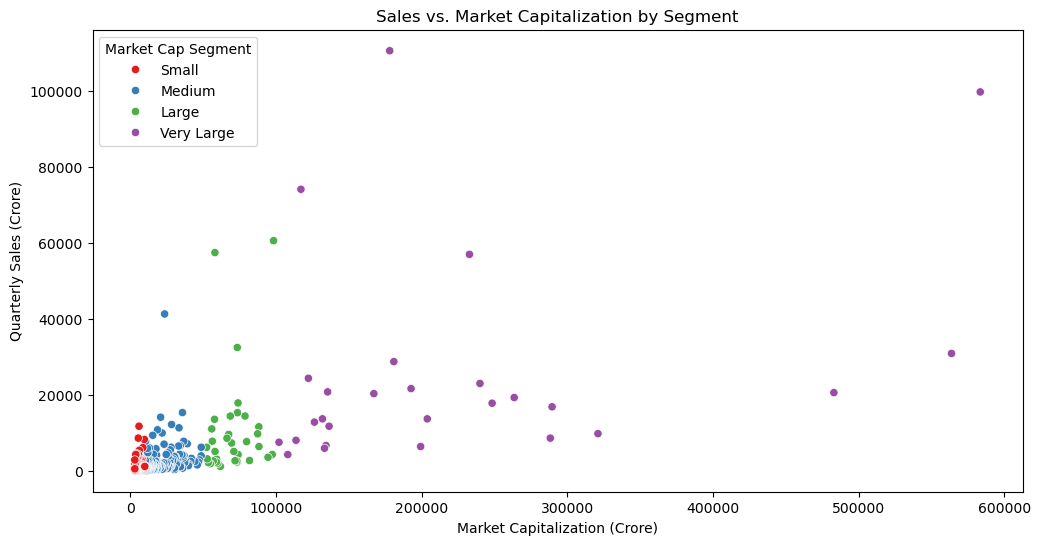

In [16]:
# Scatter plot of Sales vs. Market Cap by Segment
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', hue='MarketCap_Segment', data=data, palette='Set1')
plt.title('Sales vs. Market Capitalization by Segment')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.legend(title='Market Cap Segment')
plt.show()

# Summary:
# - Scatter plot visualizes the relationship between market capitalization and sales across different segments.
# - Helps identify trends and outliers within each segment.
# - Reveals how sales performance scales with market cap.


In [20]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the cleaned dataset
data = pd.read_csv('cleaned_Financial_Analytics_data.csv')

# Ensure 'Sales_to_MarketCap' column is present
if 'Sales_to_MarketCap' not in data.columns:
    data['Sales_to_MarketCap'] = data['Sales Qtr - Crore'] / data['Mar Cap - Crore']

# 1. Distribution of Market Capitalization
fig_mar_cap = px.histogram(data, x='Mar Cap - Crore', nbins=20, title='Distribution of Market Capitalization', labels={'Mar Cap - Crore': 'Market Capitalization (Crore)'}, histnorm='density')
fig_mar_cap.update_traces(marker_color='blue', showlegend=False)

# 2. Distribution of Quarterly Sales
fig_sales_qtr = px.histogram(data, x='Sales Qtr - Crore', nbins=20, title='Distribution of Quarterly Sales', labels={'Sales Qtr - Crore': 'Quarterly Sales (Crore)'}, histnorm='density')
fig_sales_qtr.update_traces(marker_color='green', showlegend=False)

# 3. Average Sales-to-Market Cap Ratio by Market Cap Segment
bins = [0, 5000, 20000, 50000, 100000, np.inf]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
data['MarketCap_Segment'] = pd.cut(data['Mar Cap - Crore'], bins=bins, labels=labels)
segment_analysis = data.groupby('MarketCap_Segment')['Sales_to_MarketCap'].mean().reset_index()
fig_avg_sales_to_cap = px.bar(segment_analysis, x='MarketCap_Segment', y='Sales_to_MarketCap', title='Average Sales-to-Market Cap Ratio by Market Cap Segment', labels={'Sales_to_MarketCap': 'Sales-to-Market Cap Ratio'})
fig_avg_sales_to_cap.update_traces(marker_color='purple')

# 4. Correlation Heatmap
correlation = data[['Mar Cap - Crore', 'Sales Qtr - Crore', 'Sales_to_MarketCap']].corr()
fig_correlation = px.imshow(correlation, text_auto=True, title='Correlation Heatmap')
fig_correlation.update_layout(margin=dict(l=40, r=40, t=40, b=40))

# 5. Distribution of Sales-to-Market Cap Ratio
fig_sales_to_cap_dist = px.histogram(data, x='Sales_to_MarketCap', nbins=20, title='Distribution of Sales-to-Market Cap Ratio', labels={'Sales_to_MarketCap': 'Sales-to-Market Cap Ratio'}, histnorm='density')
fig_sales_to_cap_dist.update_traces(marker_color='orange')

# 6. Top 10 Companies by Sales-to-Market Cap Ratio
top_10_sales_to_cap = data.nlargest(10, 'Sales_to_MarketCap')[['Name', 'Sales_to_MarketCap', 'Mar Cap - Crore', 'Sales Qtr - Crore']]
fig_top_10_sales_to_cap = px.bar(top_10_sales_to_cap, x='Sales_to_MarketCap', y='Name', title='Top 10 Companies by Sales-to-Market Cap Ratio', orientation='h')
fig_top_10_sales_to_cap.update_traces(marker_color='teal')

# 7. Top 10 Companies by Market Cap
top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Sales_to_MarketCap']]
fig_top_10_market_cap = px.bar(top_10_market_cap, x='Mar Cap - Crore', y='Name', title='Top 10 Companies by Market Capitalization', orientation='h')
fig_top_10_market_cap.update_traces(marker_color='blue')

# 8. DBSCAN Clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Mar Cap - Crore', 'Sales Qtr - Crore']])
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data_scaled)
fig_dbscan = px.scatter(data, x='Mar Cap - Crore', y='Sales Qtr - Crore', color='Cluster', title='Clusters of Companies (DBSCAN)')
fig_dbscan.update_traces(marker=dict(size=10))

# 9. Trend of Sales-to-Market Cap Ratio Over Time Periods
data['Time_Period'] = pd.qcut(data.index, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
trend_analysis = data.groupby('Time_Period')['Sales_to_MarketCap'].mean().reset_index()
fig_trend_sales_to_cap = px.line(trend_analysis, x='Time_Period', y='Sales_to_MarketCap', title='Trend of Sales-to-Market Cap Ratio Over Time')

# Define layout
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Financial Analytics Dashboard", style={'textAlign': 'center'}),
    
    # Row 1
    html.Div([
        dcc.Graph(figure=fig_mar_cap, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_sales_qtr, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 2
    html.Div([
        dcc.Graph(figure=fig_avg_sales_to_cap, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_correlation, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 3
    html.Div([
        dcc.Graph(figure=fig_sales_to_cap_dist, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_top_10_sales_to_cap, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 4
    html.Div([
        dcc.Graph(figure=fig_top_10_market_cap, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_dbscan, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 5
    html.Div([
        dcc.Graph(figure=fig_trend_sales_to_cap, style={'width': '48%', 'display': 'inline-block'})
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8054)


In [21]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the cleaned dataset
data = pd.read_csv('cleaned_Financial_Analytics_data.csv')

# Ensure 'Sales_to_MarketCap' column is present
if 'Sales_to_MarketCap' not in data.columns:
    data['Sales_to_MarketCap'] = data['Sales Qtr - Crore'] / data['Mar Cap - Crore']

# 1. Distribution of Market Capitalization
fig_mar_cap = px.histogram(data, x='Mar Cap - Crore', nbins=20, title='Distribution of Market Capitalization', labels={'Mar Cap - Crore': 'Market Capitalization (Crore)'}, histnorm='density')
fig_mar_cap.update_traces(marker_color='blue', showlegend=False)

# 2. Distribution of Quarterly Sales
fig_sales_qtr = px.histogram(data, x='Sales Qtr - Crore', nbins=20, title='Distribution of Quarterly Sales', labels={'Sales Qtr - Crore': 'Quarterly Sales (Crore)'}, histnorm='density')
fig_sales_qtr.update_traces(marker_color='green', showlegend=False)

# 3. Average Sales-to-Market Cap Ratio by Market Cap Segment
bins = [0, 5000, 20000, 50000, 100000, np.inf]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
data['MarketCap_Segment'] = pd.cut(data['Mar Cap - Crore'], bins=bins, labels=labels)
segment_analysis = data.groupby('MarketCap_Segment')['Sales_to_MarketCap'].mean().reset_index()
fig_avg_sales_to_cap = px.bar(segment_analysis, x='MarketCap_Segment', y='Sales_to_MarketCap', title='Average Sales-to-Market Cap Ratio by Market Cap Segment', labels={'Sales_to_MarketCap': 'Sales-to-Market Cap Ratio'})
fig_avg_sales_to_cap.update_traces(marker_color='purple')

# 4. Correlation Heatmap
correlation = data[['Mar Cap - Crore', 'Sales Qtr - Crore', 'Sales_to_MarketCap']].corr()
fig_correlation = px.imshow(correlation, text_auto=True, title='Correlation Heatmap')
fig_correlation.update_layout(margin=dict(l=40, r=40, t=40, b=40))

# 5. Distribution of Sales-to-Market Cap Ratio
fig_sales_to_cap_dist = px.histogram(data, x='Sales_to_MarketCap', nbins=20, title='Distribution of Sales-to-Market Cap Ratio', labels={'Sales_to_MarketCap': 'Sales-to-Market Cap Ratio'}, histnorm='density')
fig_sales_to_cap_dist.update_traces(marker_color='orange')

# 6. Top 10 Companies by Sales-to-Market Cap Ratio
top_10_sales_to_cap = data.nlargest(10, 'Sales_to_MarketCap')[['Name', 'Sales_to_MarketCap', 'Mar Cap - Crore', 'Sales Qtr - Crore']]
fig_top_10_sales_to_cap = px.bar(top_10_sales_to_cap, x='Sales_to_MarketCap', y='Name', title='Top 10 Companies by Sales-to-Market Cap Ratio', orientation='h')
fig_top_10_sales_to_cap.update_traces(marker_color='teal')

# 7. Top 10 Companies by Market Cap
top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Sales_to_MarketCap']]
fig_top_10_market_cap = px.bar(top_10_market_cap, x='Mar Cap - Crore', y='Name', title='Top 10 Companies by Market Capitalization', orientation='h')
fig_top_10_market_cap.update_traces(marker_color='blue')

# 8. DBSCAN Clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Mar Cap - Crore', 'Sales Qtr - Crore']])
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data_scaled)
fig_dbscan = px.scatter(data, x='Mar Cap - Crore', y='Sales Qtr - Crore', color='Cluster', title='Clusters of Companies (DBSCAN)')
fig_dbscan.update_traces(marker=dict(size=10))

# 9. Trend of Sales-to-Market Cap Ratio Over Time Periods
data['Time_Period'] = pd.qcut(data.index, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
trend_analysis = data.groupby('Time_Period')['Sales_to_MarketCap'].mean().reset_index()
fig_trend_sales_to_cap = px.line(trend_analysis, x='Time_Period', y='Sales_to_MarketCap', title='Trend of Sales-to-Market Cap Ratio Over Time')

# Define layout
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Financial Analytics Dashboard", style={'textAlign': 'center'}),
    
    # Row 1
    html.Div([
        dcc.Graph(figure=fig_mar_cap, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_sales_qtr, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 2
    html.Div([
        dcc.Graph(figure=fig_avg_sales_to_cap, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_correlation, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 3
    html.Div([
        dcc.Graph(figure=fig_sales_to_cap_dist, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_top_10_sales_to_cap, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 4
    html.Div([
        dcc.Graph(figure=fig_top_10_market_cap, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(figure=fig_dbscan, style={'width': '48%', 'display': 'inline-block'})
    ]),
    
    # Row 5
    html.Div([
        dcc.Graph(figure=fig_trend_sales_to_cap, style={'width': '48%', 'display': 'inline-block'})
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8054)
